# Confocal-Sample20 - Analysis Partner

In [1]:
import sys, os
from time import sleep, time
import numpy as np
codebase_dir = '/Users/juan/ZiaLab/Codebase'
sys.path.append(codebase_dir)
%reload_ext autoreload
%autoreload 2
%load_ext autotime
from matplotlib import pyplot as plt
import pickle
import h5py
data_dir = '/Volumes/jlizaraz/ZiaLab/Log/Data'
graphs_dir = '/Volumes/jlizaraz/ZiaLab/Log/Graphs'
from zialab.analysis import fits

## Pixis Intensity Calibration

In [231]:
ground_truth = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/intensical - 1646945002.pkl','rb'))
ground_truth = np.array([ground_truth['waves'], ground_truth['signal_avg']/np.max(ground_truth['signal_avg'])]).T
for_reals =  pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/intensical - 1646944838.pkl','rb'))
for_reals = np.array([for_reals['waves'], for_reals['signal_avg']/np.max(for_reals['signal_avg'])]).T
old_ref = np.genfromtxt('../data/intensical_ref.csv',delimiter=',')
old_ref[:,1] = old_ref[:,1]/np.max(old_ref[:,1])
better_gt = np.genfromtxt('../data/intensical_ref_2.csv',delimiter=',')

In [221]:
other_gt = np.genfromtxt('/Users/juan/Downloads/LSVN0021.txt')

In [205]:
import numpy as np
def moving_average(x, w):
    # ref https://www.delftstack.com/howto/python/moving-average-python/
    return np.convolve(x, np.ones(w), 'valid') / w

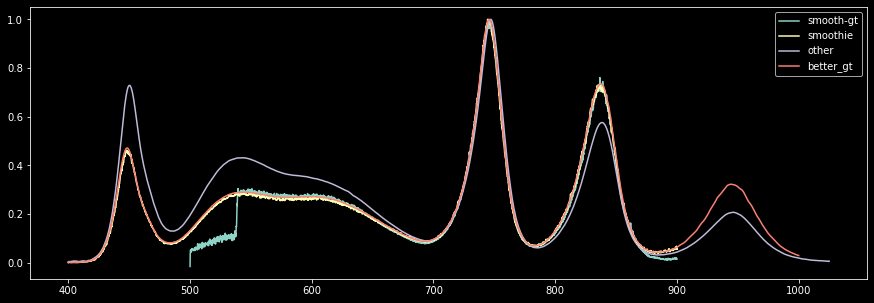

In [233]:
window_size = 1
smooth_gt_waves = moving_average(old_ref[:,0],window_size)
smooth_gt_light = moving_average(old_ref[:,1],window_size)
smooth_gt = np.array([smooth_gt_waves, smooth_gt_light]).T
plt.figure(figsize=(15,5))
plt.plot(ground_truth[:,0], ground_truth[:,1],label='smooth-gt')
plt.plot(smooth_gt[:,0], smooth_gt[:,1],label='smoothie')
plt.plot(other_gt[:,0], other_gt[:,1], label='other')
plt.plot(better_gt[:,0], better_gt[:,1],label='better_gt')
plt.legend()
plt.show()

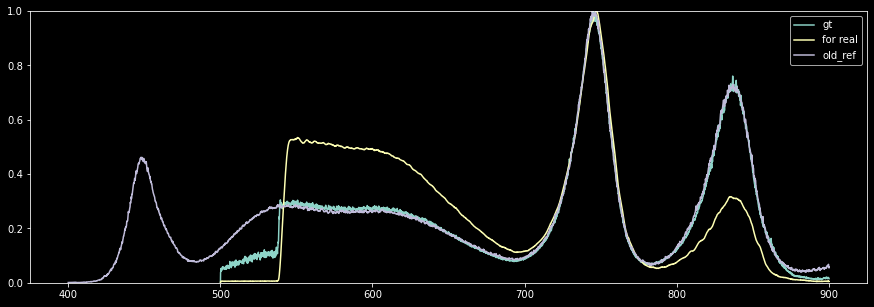

In [197]:
plt.figure(figsize=(15,5))
# plt.plot(ground_truth['waves'],ground_truth['signal_avg']/np.max(ground_truth['signal_avg']),label='gt')
# plt.plot(for_reals['waves'],for_reals['signal_avg']/np.max(for_reals['signal_avg']),label='actual')
plt.plot(ground_truth[:,0], ground_truth[:,1],label='gt')
plt.plot(for_reals[:,0], for_reals[:,1],label='for real')
plt.plot(old_ref[:,0], old_ref[:,1],label='old_ref')
plt.ylim(0,1)
plt.legend()
plt.show()

In [234]:
ical_ref = np.genfromtxt('../data/intensical_ref.csv',delimiter=',')
# calibration factor
eta_y = np.interp(for_reals[:,0],ical_ref[:,0],ical_ref[:,1])/for_reals[:,1]
eta_x = for_reals[:,0]

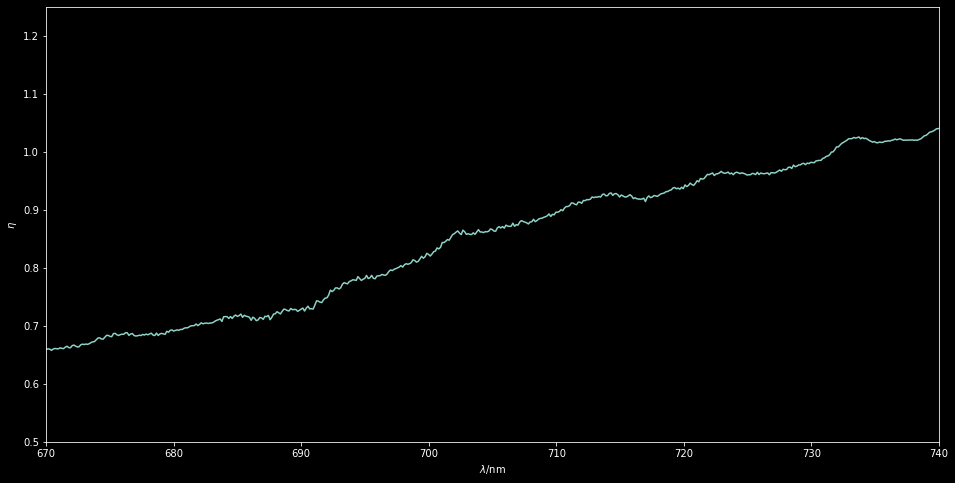

In [243]:
# calibration factor
eta_y = np.interp(for_reals[:,0],ical_ref[:,0],ical_ref[:,1])/for_reals[:,1]
eta_x = for_reals[:,0]
plt.figure(figsize=(16,8))
plt.plot(for_reals[:,0],np.interp(for_reals[:,0],ical_ref[:,0],ical_ref[:,1])/for_reals[:,1])
plt.ylim(0,2)
plt.xlabel('$\lambda$/nm')
plt.ylabel('$\eta$')
plt.xlim(670,740)
plt.ylim(0.50,1.25)
plt.show()

## Better Export - With Better Intensity Calibration

In [245]:
ical_ref = np.genfromtxt('../data/intensical_ref.csv',delimiter=',')
for_reals =  pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/intensical - 1646944838.pkl','rb'))
for_reals = np.array([for_reals['waves'], for_reals['signal_avg']/np.max(for_reals['signal_avg'])]).T
# calibration factor
eta_y = np.interp(for_reals[:,0],ical_ref[:,0],ical_ref[:,1])/for_reals[:,1]
eta_x = for_reals[:,0]

In [ ]:

plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647465263.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

In [252]:
def exporter(pklfname, ical=True):
    # import pickle batch data
    spectrum = pickle.load(open(pklfname,'rb'))
    if ical:
        h5fname = pklfname.replace('.pkl','-ical.h5')
    else:
        h5fname = pklfname.replace('.pkl','-no-ical.h5')
    min_wave = 1e12
    max_wave = -1e12
    all_waves = []
    all_PL = []
    all_std = []
    all_bkg = []
    for cwave in sorted(spectrum.keys()):
        waves = spectrum[cwave]['waves']
        PL = spectrum[cwave]['signal_avg']
        std = spectrum[cwave]['signal_std']
        if ical:
            cal = np.abs(np.interp(waves, eta_x, eta_y))
            PL = np.abs(PL * cal)
            std = std * cal
        all_waves.extend(list(waves))
        all_PL.extend(PL)
        all_std.extend(std)
        for bgk in spectrum[cwave]['bkg']:
            all_bkg.append(bgk[0][:,1])
        min_wave = min(min_wave, min(waves))
        max_wave = max(max_wave, max(waves))
    all_waves= np.array(all_waves)
    all_PL = np.array(all_PL)
    all_std = np.array(all_std)
    sorter = np.argsort(all_waves)
    all_waves = all_waves[sorter]
    all_PL = all_PL[sorter]
    all_std = all_std[sorter]
    with h5py.File(h5fname,'w') as h5file:
        h5file.create_dataset('/waves',data=all_waves)
        h5file.create_dataset('/PL',data=all_PL)
        h5file.create_dataset('/std',data=all_std)

In [254]:
exporter('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1646930464.pkl', False)
exporter('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1646930464.pkl', True)

# Fitting to an indeterminate number of Lorentzians

In [2]:
evtocm = 8065.544290
waves = np.array(h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1646930464-no-ical.h5','r')['/waves'])
PL = np.array(h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1646930464-no-ical.h5','r')['/PL'])
energies = 1240/waves
selector = (energies <= 1.8) & (energies>=1.6)
energies = energies[selector]
PL = PL[selector]
PL = PL*energies**2
norm = max(PL)
PL = PL/norm
energies = energies*evtocm

In [3]:
x = energies
y = PL
max_terms = 20
lorenzo = fits.spectrum_3param_fit(x, y, fits.lorentz_model, max_terms, maxfev=1e6)
carl = fits.spectrum_3param_fit(x, y, fits.gaussian_model, max_terms, maxfev=1e6)
voigt = fits.spectrum_4param_fit(x, y, fits.pseudo_voigt_model, max_terms, maxfev=1e6)

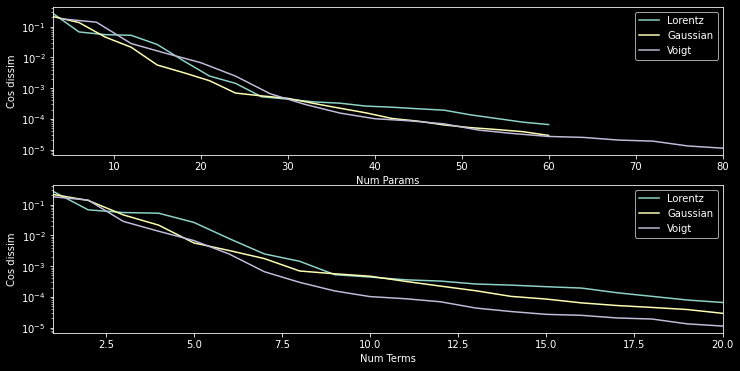

In [700]:
fig, ax = plt.subplots(nrows=2, ncols=1 , figsize=(12,6))
ax[0].plot(np.arange(1, max_terms+1)*3, 1-lorenzo[1],label='Lorentz')
ax[0].plot(np.arange(1, max_terms+1)*3, 1-carl[1], label='Gaussian')
ax[0].plot(np.arange(1, max_terms+1)*4, 1-voigt[1], label='Voigt')
ax[0].set_yscale('log')
ax[0].set_xlabel('Num Params')
ax[0].set_ylabel('Cos dissim')
ax[0].set_xlim(3,max_terms*4)
ax[0].legend()

ax[1].plot(np.arange(1,max_terms+1)*1,1-lorenzo[1],label='Lorentz')
ax[1].plot(np.arange(1,max_terms+1)*1,1-carl[1], label='Gaussian')
ax[1].plot(np.arange(1,max_terms+1)*1,1-voigt[1], label='Voigt')
ax[1].set_yscale('log')
ax[1].set_xlabel('Num Terms')
ax[1].set_ylabel('Cos dissim')
ax[1].set_xlim(1,max_terms)
ax[1].legend()

plt.legend()
plt.show()

In [717]:
%config InlineBackend.figure_format='retina'

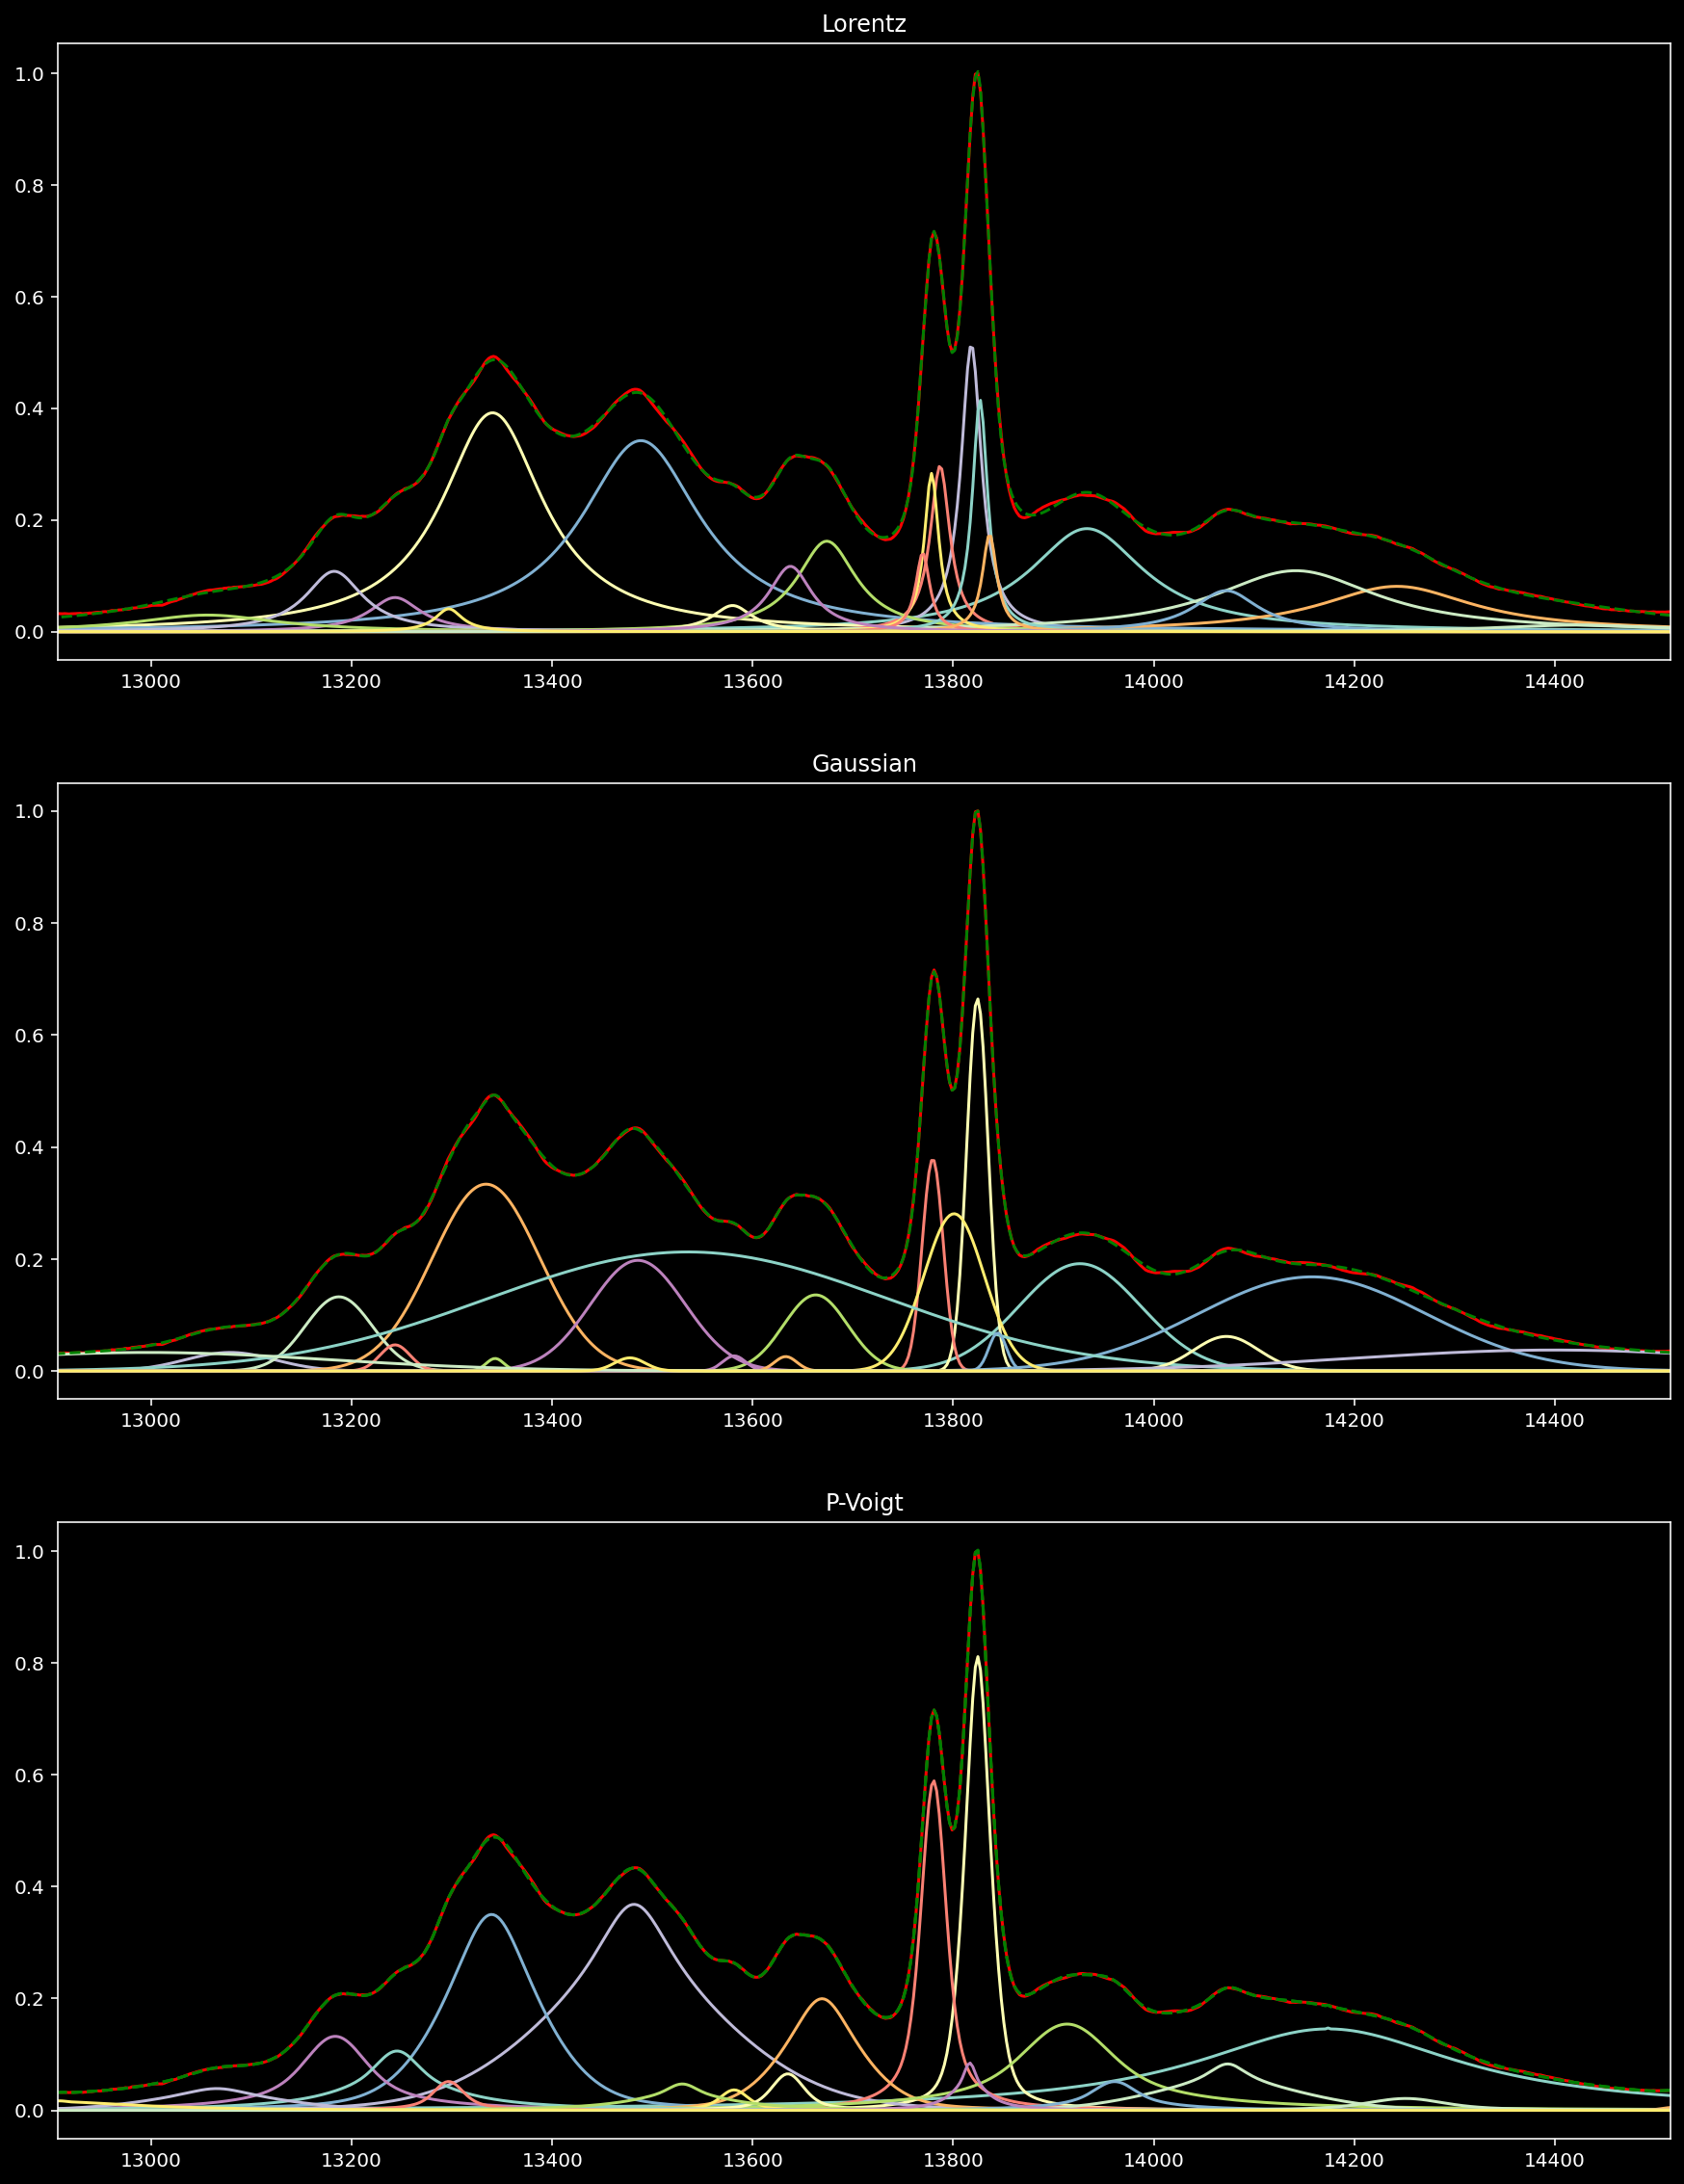

In [720]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,20))
for idx, (fitkind, fitfunkind) in enumerate(zip([lorenzo, carl, voigt],[fits.lorentz_model, fits.gaussian_model, fits.pseudo_voigt_model])):
    total_fit = np.zeros(energies.shape)
    final_fit = fitkind[0][-1]
    ax[idx].plot(energies, PL, 'r-')
    if idx == 2:
        num_terms = len(final_fit)//4
        amplitudes = final_fit[:num_terms]
        center_positions = final_fit[num_terms:2*(num_terms)]
        widthsL = final_fit[2*num_terms:3*num_terms]
        widthsG = final_fit[3*num_terms:]
        fitfun = fitfunkind(1)
        for amp, cp, wG, wL in zip(amplitudes, center_positions, widthsG, widthsL):
            fitpart = fitfun(energies, amp, cp, wL, wG)
            total_fit += fitpart
            ax[idx].plot(energies,fitpart )
        ax[idx].plot(energies, total_fit, 'g--')
    else:
        num_terms = len(final_fit)//3
        amplitudes = final_fit[:num_terms]
        center_positions = final_fit[num_terms:2*(num_terms)]
        widthsL = final_fit[2*num_terms:]
        fitfun = fitfunkind(1)
        for amp, cp, wL in zip(amplitudes, center_positions, widthsL):
            fitpart = fitfun(energies, amp, cp, wL)
            total_fit += fitpart
            ax[idx].plot(energies,fitpart )
        ax[idx].plot(energies, total_fit, 'g--')
    ax[idx].set_xlim(min(energies), max(energies))
    ax[idx].set_title(['Lorentz','Gaussian','P-Voigt'][idx])
plt.plot(energies, total_fit, 'g--')
plt.xlim(min(energies), max(energies))
plt.show()

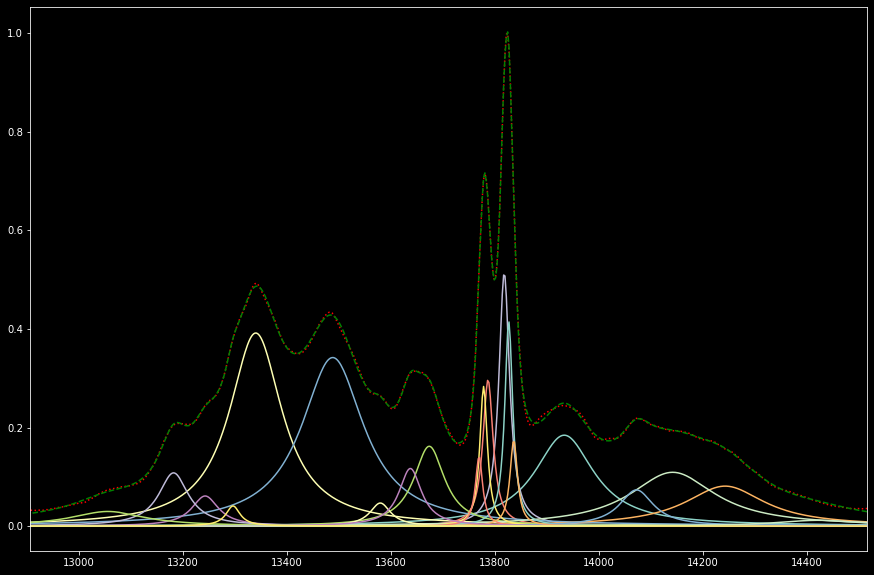

In [701]:
plt.figure(figsize=(15,10))
plt.plot(energies, PL, 'r:')
total_fit = np.zeros(energies.shape)
final_fit = lorenzo[0][-1]
num_terms = max_terms
amplitudes = final_fit[:num_terms]
center_positions = final_fit[(num_terms):2*(num_terms)]
widths = final_fit[2*num_terms:]
fitfun = fits.lorentz_model(1)
for amp, cp, w in zip(amplitudes, center_positions, widths):
    fitpart = fitfun(energies, amp, cp, w)
    total_fit += fitpart
    plt.plot(energies,fitpart )
plt.plot(energies, total_fit, 'g--')
plt.xlim(min(energies), max(energies))
plt.show()

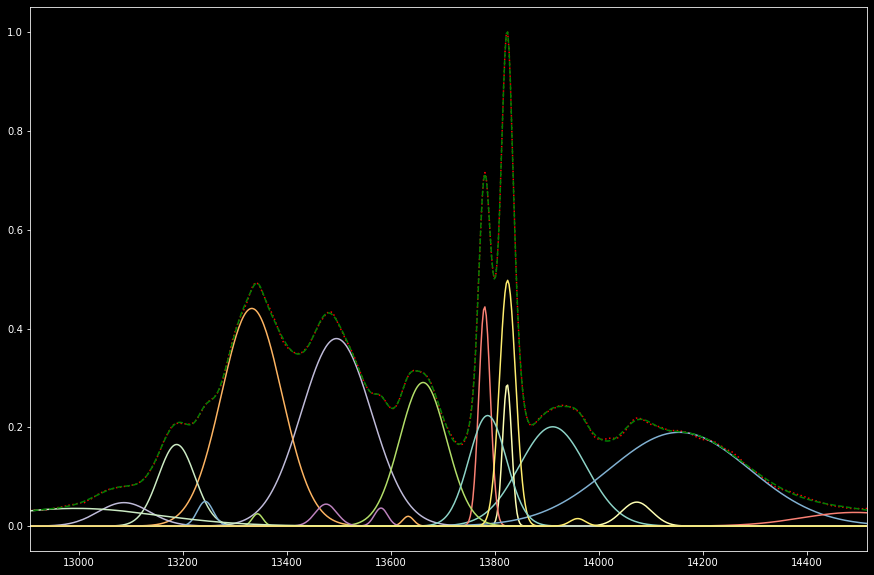

In [525]:
plt.figure(figsize=(15,10))
plt.plot(energies, PL, 'r:')
total_fit = np.zeros(energies.shape)
final_fit = carl[0][-1]
num_terms = max_terms
amplitudes = final_fit[:num_terms]
center_positions = final_fit[(num_terms):2*(num_terms)]
widths = final_fit[2*num_terms:]
fitfun = fits.gaussian_model(1)
for amp, cp, w in zip(amplitudes, center_positions, widths):
    fitpart = fitfun(energies, amp, cp, w)
    total_fit += fitpart
    plt.plot(energies,fitpart )
plt.plot(energies, total_fit, 'g--')
plt.xlim(min(energies), max(energies))
plt.show()

In [660]:
x = energies
y = PL
max_terms = 15
voigt = fits.spectrum_4param_fit(x, y, fits.pseudo_voigt_model, max_terms)

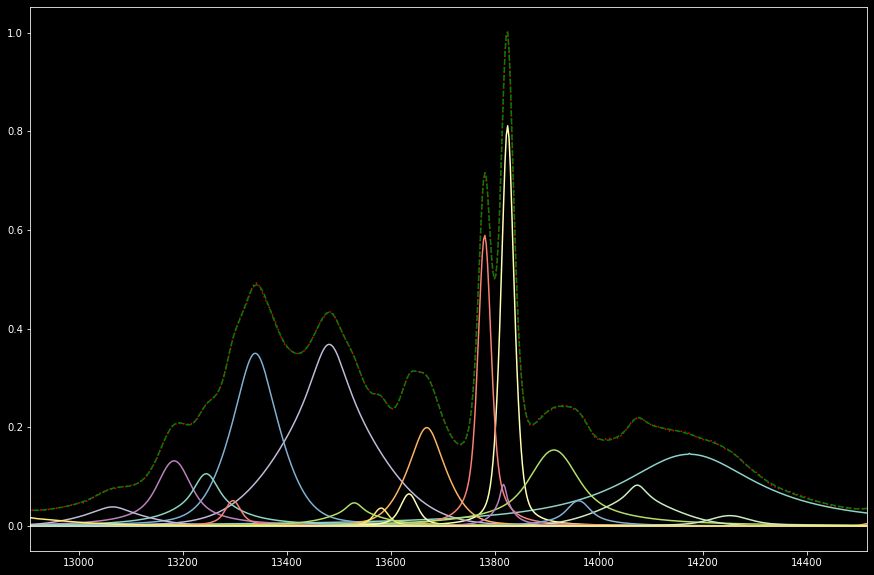

In [702]:
plt.figure(figsize=(15,10))
plt.plot(energies, PL, 'r:')
total_fit = np.zeros(energies.shape)
final_fit = voigt[0][-1]
num_terms = len(final_fit)//4
amplitudes = final_fit[:num_terms]
center_positions = final_fit[num_terms:2*(num_terms)]
widthsL = final_fit[2*num_terms:3*num_terms]
widthsG = final_fit[3*num_terms:]

fitfun = fits.pseudo_voigt_model(1)
for amp, cp, wG, wL in zip(amplitudes, center_positions, widthsG, widthsL):
    fitpart = fitfun(energies, amp, cp, wL, wG)
    total_fit += fitpart
    plt.plot(energies,fitpart )
plt.plot(energies, total_fit, 'g--')
plt.xlim(min(energies), max(energies))
plt.show()

In [602]:
# def pseudo_voigt_model(num_terms):
#     x = sp.Symbol('x')
#     γG = sp.Symbol('γG')
#     γL = sp.Symbol('γL')
#     γT = (γG**5 + 2.69269*γG**4*γL + 2.42843*γG**3*γL**2 + 4.47163*γG**2*γL**3 + 0.074842*γG*γL**4 + γL**5)**(1/5)
#     proto_η = 1.36603*γL/γT - 0.47719*(γL/γT)**2 + 0.11116*(γL/γT)**3

#     Avars = tuple([sp.Symbol('A_%d' % i) for i in range(num_terms)])
#     dvars = tuple([sp.Symbol('d_%d' % i) for i in range(num_terms)])
#     γGvars = tuple([sp.Symbol('γG_%d' % i) for i in range(num_terms)])
#     γLvars = tuple([sp.Symbol('γL_%d' % i) for i in range(num_terms)])
#     allvars = (x,) + Avars + dvars + γGvars + γLvars

#     def single_term(i):
#         A = sp.Symbol('A_%d' % i)
#         η = proto_η.subs({γL: sp.Symbol('γL_%d' % i), γG: sp.Symbol('γG_%d' % i)})
#         γLi = sp.Symbol('γL_%d' % i)
#         γGi = sp.Symbol('γG_%d' % i)
#         d = sp.Symbol('d_%d' % i )
#         single_voigt = η*1/sp.pi/γLi/((x-d)**2/γLi**2+1) + (1-η)*1/γGi/sp.sqrt(sp.pi)*sp.exp(-(x-d)**2/γGi**2)
#         single_voigt = A*single_voigt
#         return single_voigt

#     thefun = [single_term(i) for i in range(num_terms)]
#     fitfun = np.sum(thefun)
#     fitfun = sp.lambdify(allvars, fitfun, 'numpy')
#     return fitfun

In [628]:
# onevoigt = pseudo_voigt_model(1)
# x = np.linspace(-100,100,100000)
# # y = [onevoigt(xi,0.1,0.1,0.1,0.1) for xi in x]
# y = onevoigt(x,1,0,1,0.00001)

# OLD Exports

In [ ]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.pkl','rb'))


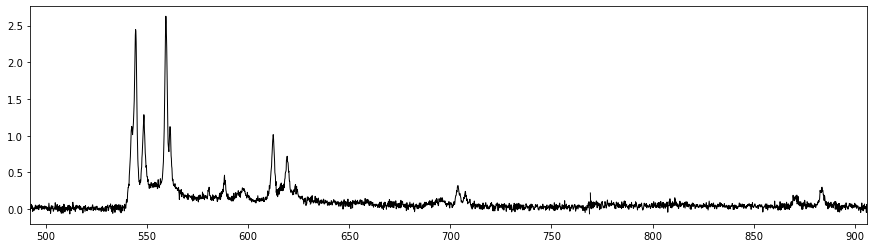

In [ ]:
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in spectrum:
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    all_waves.append(list(waves))
    all_PL.append(PL)
    all_std.append(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(min_wave, max_wave)
plt.show()
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/energies',data=all_std)

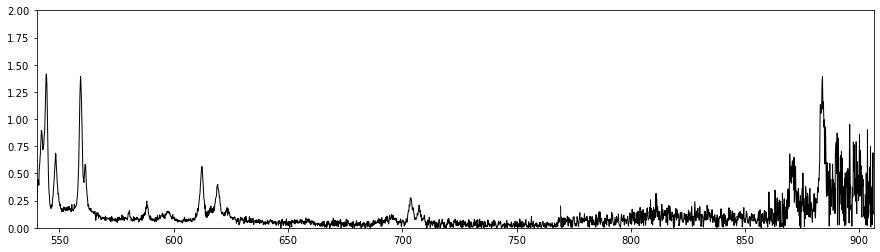

In [178]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.pkl','rb'))

plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    cal = np.abs(np.interp(waves, eta_x, eta_y))
    PL = np.abs(PL * cal)
    std = std * cal
    all_waves.append(list(waves))
    all_PL.append(PL)
    all_std.append(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0,2)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
selector = np.array(all_waves) >= 540
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])

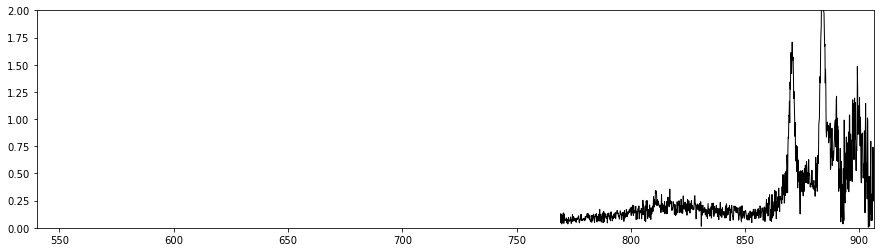

In [175]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646954485.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    cal = np.abs(np.interp(waves, eta_x, eta_y))
    PL = np.abs(PL * cal)
    std = std * cal
    all_waves.append(list(waves))
    all_PL.append(PL)
    all_std.append(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0,2)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
selector = np.array(all_waves) >= 540
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646954485.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])

In [285]:
spectra = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647009688.pkl','rb'))
all_waves = []
all_pl = []
all_stdevs = []
for cwave in sorted(spectra.keys()):
    spectrum = spectra[cwave]
    signals = spectrum['signals']
    mean_signal = np.mean(signals,axis=0)
    medians = np.median(signals, axis=0)
    stdevs = np.std(signals, axis=0)
    good_means = []
    good_stdevs = []
    for signal_col, median in zip(signals.T, medians):
        diffs = np.abs(signal_col - median)/median
        good_ones = diffs < 2
        good_mean = np.mean(signal_col[good_ones])
        good_means.append(good_mean)
        good_stdevs.append(np.std(signal_col[good_ones]))
    all_pl.extend(good_means)
    all_stdevs.extend(good_stdevs)
    all_waves.extend(spectrum['waves'])
all_waves= np.array(all_waves)
all_pl = np.array(all_pl)
all_stdevs = np.array(all_stdevs)
cal = np.abs(np.interp(all_waves, eta_x, eta_y))
all_pl = all_pl*cal
all_stdevs = all_stdevs*cal
noprob = (~np.isnan(all_pl)) & (all_waves > 540)
all_pl = all_pl[noprob]
all_stdevs = all_stdevs[noprob]
all_waves = all_waves[noprob]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647009688.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_pl)
    h5file.create_dataset('/std',data=all_stdevs)

<ipython-input-285-83a2c2204314>:14: RuntimeWarning: divide by zero encountered in true_divide
  diffs = np.abs(signal_col - median)/median
<ipython-input-285-83a2c2204314>:14: RuntimeWarning: invalid value encountered in true_divide
  diffs = np.abs(signal_col - median)/median
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, d

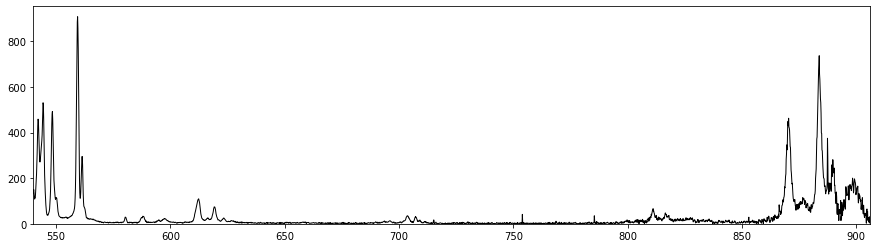

In [288]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647006858.pkl','rb'))

plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    cal = np.abs(np.interp(waves, eta_x, eta_y))
    PL = np.abs(PL * cal)
    std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
selector = np.array(all_waves) >= 540
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647006858.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])

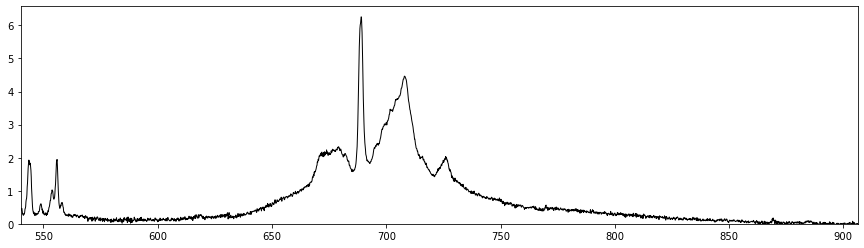

In [307]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - batch - 1646770373.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
selector = np.array(all_waves) >= 540
all_bkg = np.array(all_bkg)
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - batch - 1646770373.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])
    h5file.create_dataset('/abkg',data=all_bkg)

In [5]:
import numpy as np

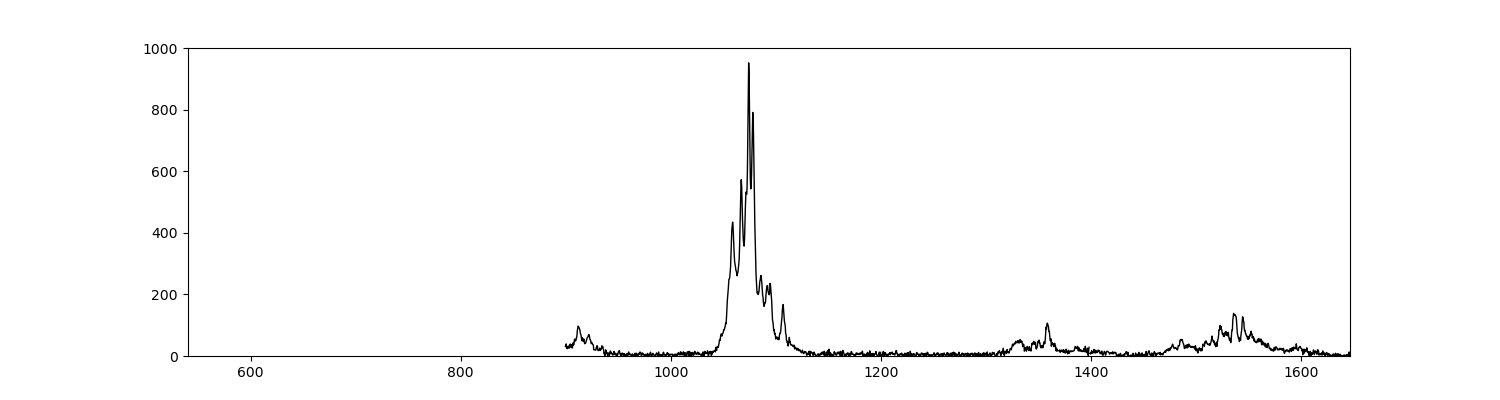

In [7]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647215218.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647215218.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

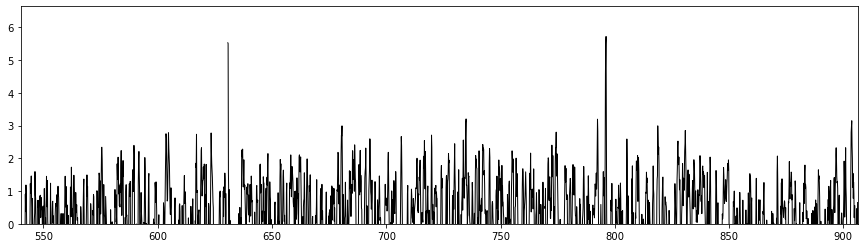

In [305]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/baseline - batch - 1647037916.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
selector = np.array(all_waves) >= 540
all_bkg = np.array(all_bkg)
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/baseline - batch - 1647037916.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])
    h5file.create_dataset('/abkg',data=all_bkg)

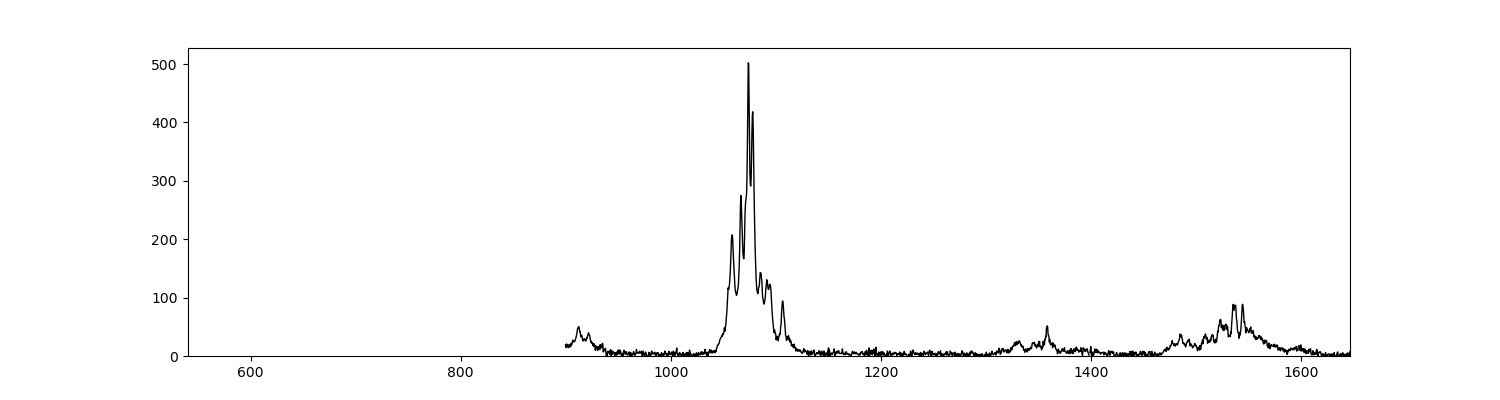

In [8]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647257211.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647257211.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

In [5]:
import numpy as np

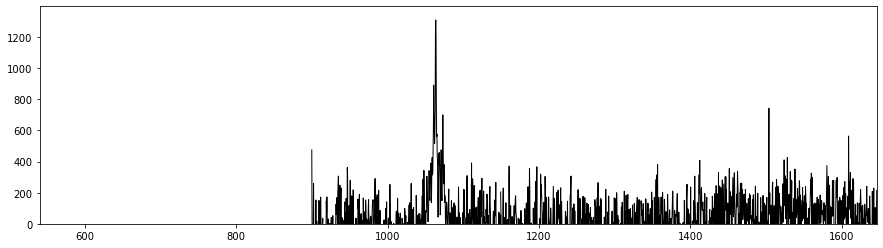

In [6]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20B - batch - 1647360291.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20B - batch - 1647360291.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

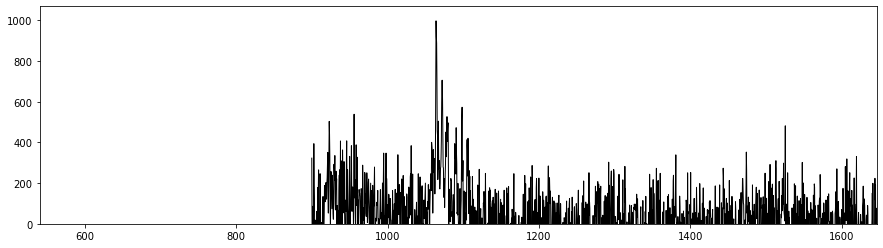

In [7]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1647367254.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1647367254.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

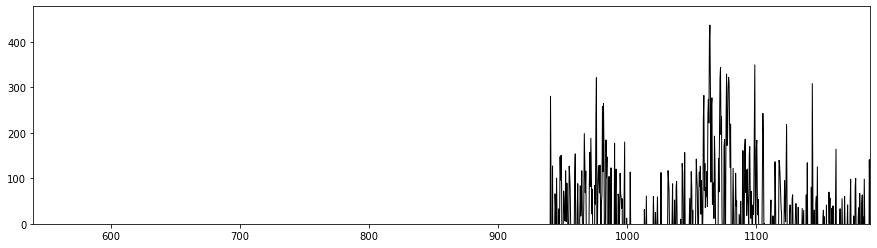

In [9]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1647370775.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1647370775.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

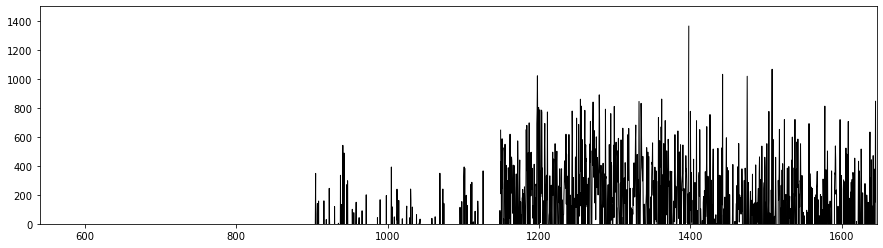

In [10]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20B - batch - 1647460772.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20B - batch - 1647460772.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

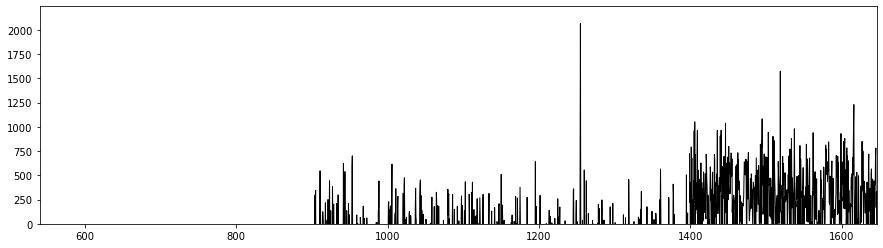

In [11]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1647458403.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20C - batch - 1647458403.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

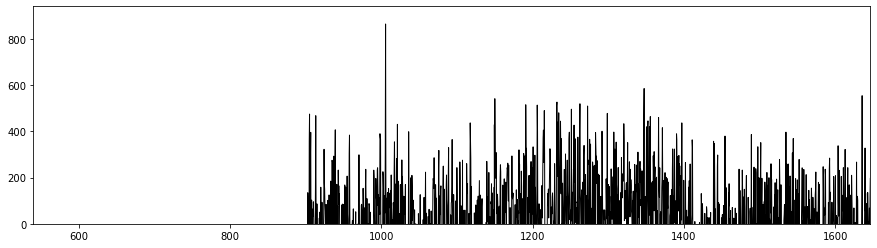

In [13]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647465263.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647465263.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/std',data=all_std)

In [116]:
10//3

3

In [122]:
pars = [0,1,2]
pars[:1], pars[1:2],pars[2:]

([0], [1], [2])

In [123]:
import random

In [124]:
random.random()

0.6516590072530837

In [14]:
import sympy as sp
x = sp.Symbol('x')



In [ ]:
from scipy.optimize import curve_fit

In [152]:
def lorentz_model(num_peaks):
    x = sp.Symbol('x')
    thef = [sp.Symbol('A_%d' % i)/(1+ 4 / sp.Symbol('w_%d' % i)**2 * (x-sp.Symbol('d_%d' % i))**2) for i in range(num_peaks)]
    Avars = tuple([sp.Symbol('A_%d' % i) for i in range(num_peaks)])
    dvars = tuple([sp.Symbol('d_%d' % i) for i in range(num_peaks)])
    wvars = tuple([sp.Symbol('w_%d' % i) for i in range(num_peaks)])
    allvars = (x,) + Avars + dvars + wvars
    fitfun = np.sum(thef)
    fitfun = sp.lambdify(allvars, fitfun, 'numpy')
    return fitfun

In [153]:
data = np.genfromtxt('/Users/juan/Data/lor.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

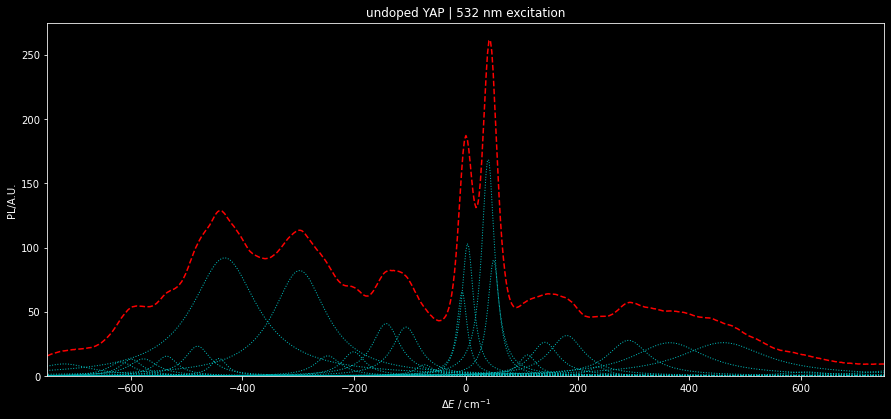

In [186]:
amps = [23.204645140506425,82.03076560603502,40.830570380960076,65.85715805786272,90.47160203069303,26.2766551892308,27.729337080139135,25.90088976167661,25.954312392618906,3.1715871607527184,4.456936035478528,10.928302615349718,9.401396352855905,13.09046935863308,18.82696855159371,16.46006926204083,31.47170747004563,8.755852934078092,6.969364805162111,38.07054780248843,15.450991770173164,15.651724100317942,103.18380229932275,169.49551554037805,13.297558964913208,13.65728367324904,91.90028621975623]
poss = [-480.1911234082517,-297.65550956362006,-142.8198355790215,-6.788581405983055,49.59346395315632,141.1536449481864,290.98565398653176,364.70899556400207,460.38311383203404,608.6194194749766,776.7840994347986,-617.1612157123435,-719.3029545203696,-598.8106606671937,-201.1385768410822,110.25594283283944,180.43241714738969,-74.07929230052437,236.00727213033062,-107.12809790830954,-535.784965921239,-247.0247365052173,3.0167040803252445,39.78676180688811,-577.191248947878,-441.9965307622577,-431.7585383630006]
widths = [56.61261380006216,116.97958150213354,60.7358358191783,22.040796666605388,25.1991819972105,60.59677546524534,88.55772650134585,159.49039275509176,189.3484162838724,101.55640857749796,156.6841317560853,56.44283170789696,122.66381826487154,48.30171290524668,49.70678833083014,38.6782211468486,75.94650643442739,39.87745759233028,42.143537436267835,58.3652219578349,48.82911085774412,56.87803805835869,25.360399155902833,27.569438569934658,63.38828446894911,35.85184755723813,141.44110087314812]
lor1 = lorentz_model(1)
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15, 6.5))
for a,p,w in zip(amps, poss, widths):
    ax.plot(x,lor1(x,*(a,p,w)),'c:',lw=1)
ax.plot(x,y,'r--')
ax.set_xlabel('$\Delta E$ / cm${}^{-1}$')
ax.set_ylabel('PL/A.U.')
ax.set_ylim(0, 275)
ax.set_xlim(min(x),max(x))
ax.set_title('undoped YAP | 532 nm excitation')
fig.savefig('/Volumes/jlizaraz/ZiaLab/Log/Graphs/YAPfit - 1647626670.png')
fig.savefig('/Volumes/jlizaraz/ZiaLab/Log/Graphs/YAPfit - 1647626670.pdf')
plt.show()


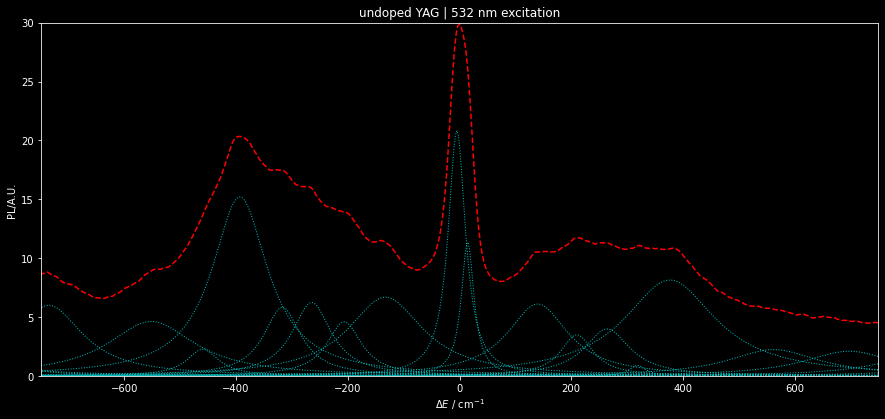

In [188]:
amps = [11.399132095186031,15.19866098847642,2.242071754412006,6.6941183614241435,6.111919933560155,6.24178534750426,3.495084975013666,2.2695175565729517,8.14711301108299,6.001137279834661,1.7266509152447067,2.7005643628513343,1.6294403609672026,4.6051920390694105,5.829130921425151,4.627529928323384,1.7189146542362814,20.832415156933582,3.9937967613852763,2.1040970283972245,0.8934109729740745]
poss = [14.51377771645299,-393.26344473127125,562.1360806896959,-132.61102897466188,139.88085918023387,-264.67986363674277,209.90717732690393,-459.6594078320816,376.6349433492036,-735.1771481318094,984.4117790317588,-975.8044815298006,825.2740878743238,-206.46622087706032,-317.2246235204837,-551.7687499844172,-856.793438016744,-4.818268501176675,264.02070904246324,697.6192886685892,318.6396959495361]
widths = [27.718638646210156,122.09840877443328,199.99999999999997,164.34719848507646,133.2780178999684,85.63104602135382,71.5620431610568,70.01988179878859,199.84463028803967,147.26148548419414,199.99999999999997,199.99999999999997,199.99999999999997,76.14355460473315,81.2386221549942,191.39015448851063,122.62413865464117,37.63869638693685,99.57182247922096,199.99999999999997,36.832699853799085]
lor1 = lorentz_model(1)

yagdata = np.genfromtxt('/Volumes/jlizaraz/ZiaLab/Log/Data/yag - 1647627190.csv', delimiter=',')
xd, yd = yagdata[:,0], yagdata[:,1]


plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15, 6.5))
for a,p,w in zip(amps, poss, widths):
    ax.plot(x,lor1(x,*(a,p,w)),'c:',lw=1)
ax.plot(xd,yd,'r--')
ax.set_xlabel('$\Delta E$ / cm${}^{-1}$')
ax.set_ylabel('PL/A.U.')
ax.set_ylim(0, 30)
ax.set_xlim(min(x),max(x))
ax.set_title('undoped YAG | 532 nm excitation')
fig.savefig('/Volumes/jlizaraz/ZiaLab/Log/Graphs/YAGfit - 1647627656.png')
fig.savefig('/Volumes/jlizaraz/ZiaLab/Log/Graphs/YAGfit - 1647627656.pdf')
plt.show()


In [192]:
str({'x': [1,2,3],
'y':[0,1,2]})

"{'x': [1, 2, 3], 'y': [0, 1, 2]}"

In [109]:
x = np.linspace(-20,10,100)
y = 1/(1+10*(x-2)**2) + 1/(1+20*(x+2)**2)
fitfun = lorentz_fitter(3)
popt, pcov = curve_fit(fitfun, x, y)

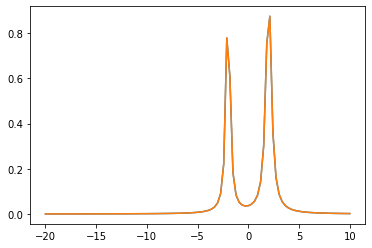

In [110]:
plt.figure()
plt.plot(x,y)
plt.plot(x, fitfun(x,*popt))
plt.show()

In [ ]:
# spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647215218.pkl','rb'))
# plt.figure(figsize=(15,4))
# min_wave = 1e12
# max_wave = -1e12
# all_waves = []
# all_PL = []
# all_std = []
# all_bkg = []
# for cwave in sorted(spectrum.keys()):
#     waves = spectrum[cwave]['waves']
#     PL = spectrum[cwave]['signal_avg'] * spectrum['repeats']
#     std = spectrum[cwave]['signal_std'] 
#     # cal = np.abs(np.interp(waves, eta_x, eta_y))
#     # PL = np.abs(PL * cal)
#     # std = std * cal
#     all_waves.extend(list(waves))
#     all_PL.extend(PL)
#     all_std.extend(std)
#     for bgk in spectrum[cwave]['bkg']:
#         all_bkg.append(bgk[0][:,1])
#     plt.plot(waves,PL,'k-',lw=1)
#     min_wave = min(min_wave, min(waves))
#     max_wave = max(max_wave, max(waves))
# plt.xlim(540, max_wave)
# plt.ylim(0)
# plt.show()
# all_waves= np.array(all_waves)
# all_PL = np.array(all_PL)
# all_std = np.array(all_std)
# sorter = np.argsort(all_waves)
# all_waves = all_waves[sorter]
# all_PL1 = all_PL[sorter]
# all_std1 = all_std[sorter]

# spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647257211.pkl','rb'))
# plt.figure(figsize=(15,4))
# min_wave = 1e12
# max_wave = -1e12
# all_waves = []
# all_PL = []
# all_std = []
# all_bkg = []
# for cwave in sorted(spectrum.keys()):
#     waves = spectrum[cwave]['waves'] d
#     PL = spectrum[cwave]['signal_avg']*spectrum['repeats']
#     std = spectrum[cwave]['signal_std']
#     # cal = np.abs(np.interp(waves, eta_x, eta_y))
#     # PL = np.abs(PL * cal)
#     # std = std * cal
#     all_waves.extend(list(waves))
#     all_PL.extend(PL)
#     all_std.extend(std)
#     for bgk in spectrum[cwave]['bkg']:
#         all_bkg.append(bgk[0][:,1])
#     plt.plot(waves,PL,'k-',lw=1)
#     min_wave = min(min_wave, min(waves))
#     max_wave = max(max_wave, max(waves))
# plt.xlim(540, max_wave)
# plt.ylim(0)
# plt.show()
# all_waves= np.array(all_waves)
# all_PL = np.array(all_PL)
# all_std = np.array(all_std)
# sorter = np.argsort(all_waves)
# all_waves = all_waves[sorter]
# all_PL2 = all_PL[sorter]
# all_std2 = all_std[sorter]

# with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647215218-1647257211.h5','w') as h5file:
#     h5file.create_dataset('/waves',data=all_waves)
#     h5file.create_dataset('/PL',data=all_PL2+all_PL1)
#     h5file.create_dataset('/std',data=1/(1/all_std2+1/all_std1))

In [103]:
import pandas as pd

In [104]:
lines = pd.read_pickle('/Users/juan/ZiaLab/Codebase/zialab/data/NIST/nist_atomic_spectra_database_lines.pkl')

In [127]:
for index, row in lines[(np.abs(lines['obs_wl_vac(nm)'] - 871) < 4) & (np.abs(lines['obs_wl_vac(nm)']-884) < 4)].iterrows():
    element = (row['element'])
    print(element)
    if element in ['Nb']:
        print('-----')
        print(row)

In [162]:
RE_lines = lines[lines['element'].apply(lambda x: x in 'La Ce Pr Nd Pm Sm Eu Gd Tb Dy Ho Er Tm Yb'.split(' '))]
RE_lines.reset_index(inplace=True)

In [166]:
m_lines = RE_lines[(RE_lines['obs_wl_vac(nm)'] < 900) & (RE_lines['obs_wl_vac(nm)'] > 850)]
m_lines.reset_index(inplace=True)
diffs = [idx for l0, l1, idx in zip(m_lines['obs_wl_vac(nm)'], m_lines['obs_wl_vac(nm)'], m_lines.index) if abs(abs(l0-l1) - 13) < 13.1]
len(diffs)

104

In [ ]:
plt.ion()

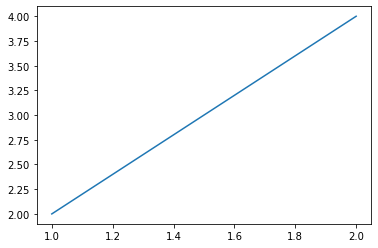

In [323]:
fig, ax = plt.subplots()
p0 = ax.plot([1,2],[2,4])

In [326]:
p0[0].set_xdata([2,4])
fig.canvas.draw()
import time

In [335]:
%matplotlib widget

In [4]:
import numpy as np

In [ ]:
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(x)

# The really important command for interactive plot updating
plt.ion()

# sizing of the plots figure sizes 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 3

# Two figures 
# -----------
fig1 = plt.figure(1)
fig2 = plt.figure(2)

# first figure with two plot-areas with axes 
# --------------------------------------------
ax1_1 = fig1.add_subplot(121)
ax1_2 = fig1.add_subplot(122)

fig1.canvas.draw()

# second figure with just one plot area with axes
# -------------------------------------------------
ax2 = fig2.add_subplot(121)
line1, = ax2.plot(x, y, 'b-')
fig2.canvas.draw()

z= 32
b = np.zeros([1])
c = np.zeros([1])
c[0] = 1000
plt.show()


In [8]:
import time
for i in range(z):
    # update data 
    phase = np.pi / z * i 
    line1.set_ydata(np.sin(0.5 * x + phase))
    b = np.append(b, [i**2])
    c = np.append(c, [1000.0 - i**2])
    
    # re-plot area 1 of fig1  
    ax1_1.clear()
    ax1_1.set_xlim (0, 100)
    ax1_1.set_ylim (0, 1000)
    ax1_1.plot(b)
    
    # re-plot area 2 of fig1  
    ax1_2.clear()
    ax1_2.set_xlim (0, 100)
    ax1_2.set_ylim (0, 1000)
    ax1_2.plot(c)
    
    # redraw fig 1 
    fig1.canvas.draw()

    # redraw fig 2 with updated data  
    fig2.canvas.draw()
    
    time.sleep(0.1)